In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('senior_set.csv')

In [ ]:
data['FL_DATE'] = pd.to_datetime(data['FL_DATE'])

In [ ]:
data = data.sort_values(by="FL_DATE", ascending=True).reset_index(drop=True)

## Meaning of some of the columns
#### 1. CRS = ones are the scheduled time
#### 2. Taxi_out / in = The time in minutes that the aircraft spent taxiing out from the gate to the runway before takeoff and viceversa
#### 3. wheel off = exact time of takeoff
#### 4. Elapsed time = The actual flight duration ( if crs then scheduled one )
#### 5. Air_time = wheels on - wheels off

In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'FL_DATE', 'AIRLINE', 'AIRLINE_DOT',
       'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY',
       'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [ ]:
data[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY']]

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY
0,1354,1443.0,49.0
1,1910,1920.0,10.0
2,600,602.0,2.0
3,1023,1012.0,-11.0
4,1601,1613.0,12.0
...,...,...,...
2999995,1815,1807.0,-8.0
2999996,2020,2025.0,5.0
2999997,945,1015.0,30.0
2999998,800,1003.0,123.0


#### lets see what is the main reason behind dep delay

In [ ]:
data.loc[data.DEP_DELAY >0 , :]

,Unnamed: 0.1,Unnamed: 0,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2221248,2221248,2019-01-01,JetBlue Airways,JetBlue Airways: B6,B6,20409,1527,EWR,"Newark, NJ",...,0.0,178.0,191.0,157.0,937.0,17.0,0.0,13.0,0.0,32.0
1,1942922,1942922,2019-01-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1265,TPA,"Tampa, FL",...,0.0,110.0,100.0,88.0,612.0,NaN,NaN,NaN,NaN,NaN
2,156313,156313,2019-01-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1409,IAH,"Houston, TX",...,0.0,124.0,108.0,87.0,689.0,NaN,NaN,NaN,NaN,NaN
4,964834,964834,2019-01-01,Frontier Airlines Inc.,Frontier Airlines Inc.: F9,F9,20436,1780,MCO,"Orlando, FL",...,0.0,152.0,135.0,120.0,971.0,NaN,NaN,NaN,NaN,NaN
7,531869,531869,2019-01-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,312,SJC,"San Jose, CA",...,0.0,105.0,111.0,92.0,621.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999992,788839,788839,2023-08-31,Envoy Air,Envoy Air: MQ,MQ,20398,3468,DFW,"Dallas/Fort Worth, TX",...,0.0,54.0,45.0,31.0,158.0,NaN,NaN,NaN,NaN,NaN
2999996,451954,451954,2023-08-31,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,642,SEA,"Seattle, WA",...,0.0,157.0,152.0,128.0,1024.0,NaN,NaN,NaN,NaN,NaN
2999997,854861,854861,2023-08-31,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,1244,DEN,"Denver, CO",...,0.0,110.0,107.0,83.0,628.0,0.0,0.0,0.0,0.0,27.0
2999998,1708415,1708415,2023-08-31,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,2409,TPA,"Tampa, FL",...,0.0,166.0,142.0,122.0,997.0,99.0,0.0,0.0,0.0,0.0


In [ ]:
data.isnull().sum()

Unnamed: 0.1                     0
Unnamed: 0                       0
FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE            

#### We need to predict delay durations and rescheduled flights which are over delayed
##### reduce overall turn around flight cost
##### so we will drop some of the useless cols

In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'FL_DATE', 'AIRLINE', 'AIRLINE_DOT',
       'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY',
       'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [ ]:
luck=data[['ORIGIN','DEST','DELAY_DUE_CARRIER','DEP_DELAY','ARR_DELAY','AIRLINE','CRS_DEP_TIME','CRS_ARR_TIME']]
luck=luck[~(luck.DELAY_DUE_CARRIER.isna())]

In [ ]:
data.drop(['AIRLINE_DOT','AIRLINE_CODE','DOT_CODE','ORIGIN_CITY','DEST_CITY', 'DEP_TIME', 'ARR_TIME','CANCELLATION_CODE','CRS_ELAPSED_TIME',
       'ELAPSED_TIME',],axis=1,inplace=True)

In [ ]:
data.head(1)

,Unnamed: 0.1,Unnamed: 0,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,...,ARR_DELAY,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2221248,2221248,2019-01-01,JetBlue Airways,1527,EWR,MCO,1354,49.0,19.0,...,62.0,0.0,0.0,157.0,937.0,17.0,0.0,13.0,0.0,32.0


In [ ]:
data.ORIGIN.unique().shape

(380,)

In [ ]:
late_dept=data[data.DEP_DELAY > 0 ]
late_arr=data[data.ARR_DELAY > 0 ]

In [ ]:
late_dept.head(1)

,Unnamed: 0.1,Unnamed: 0,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,...,ARR_DELAY,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2221248,2221248,2019-01-01,JetBlue Airways,1527,EWR,MCO,1354,49.0,19.0,...,62.0,0.0,0.0,157.0,937.0,17.0,0.0,13.0,0.0,32.0


In [ ]:
#### lets see which airlines is mostly departing the flights late

In [ ]:
pok=late_dept.groupby('AIRLINE')['DEP_DELAY'].size().sort_values(ascending=False).reset_index()

In [ ]:
kok=late_arr.groupby('AIRLINE')['ARR_DELAY'].size().sort_values(ascending=False).reset_index()

In [ ]:
import matplotlib.pyplot as plt

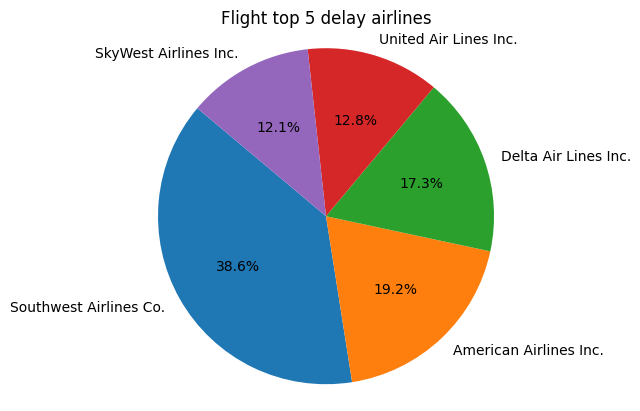

In [ ]:
plt.pie(pok.DEP_DELAY[:5], labels=pok.AIRLINE[:5],autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.title('Flight top 5 delay airlines')
plt.show()

## insights
#### This pie chart reflects that mostly Southwest airlines delayes the departure of its flights
#### so possibility of delay is maximum if the airlines is the top 3-4 among these

#### Lets also see this for arrival time

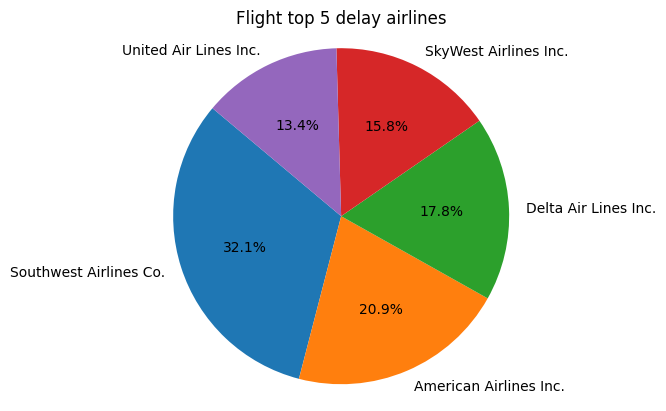

In [ ]:
plt.pie(kok.ARR_DELAY[:5], labels=kok.AIRLINE[:5],autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.title('Flight top 5 delay airlines')
plt.show()

#### Southwest airlines also tops here . NICE :)
#### But % of arrival delay flights of Southwest airlines has decreased to some extent
#### means it performs better in arrival situations

In [ ]:
data.isnull().sum()

Unnamed: 0.1                     0
Unnamed: 0                       0
FL_DATE                          0
AIRLINE                          0
FL_NUMBER                        0
ORIGIN                           0
DEST                             0
CRS_DEP_TIME                     0
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_DELAY                    86198
CANCELLED                        0
DIVERTED                         0
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER          2466137
DELAY_DUE_NAS              2466137
DELAY_DUE_SECURITY         2466137
DELAY_DUE_LATE_AIRCRAFT    2466137
dtype: int64

In [ ]:
data[['DEP_DELAY','ARR_DELAY']]=data[['DEP_DELAY','ARR_DELAY']].fillna(0)

In [ ]:
data.shape

(3000000, 24)

In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'FL_DATE', 'AIRLINE', 'FL_NUMBER',
       'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'DIVERTED', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [ ]:
reasons=data[['DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT']]

In [ ]:
reasons.isna().sum(axis=1).unique()

array([0, 5], dtype=int64)

#### It means that in the reasons for flight delay, either info is present for all or for none so we have no other option rather than dropping that rows

In [ ]:
rows_to_remove=data[data.DELAY_DUE_CARRIER.isnull()].index
data.drop(rows_to_remove,inplace=True)

In [ ]:
data.shape

(533863, 24)

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

### As distance and time of flight are given we can find the avg speed of the plane
### Speed of planes depends on various factors:
#### 1.Weather
#### 2.Fuel efficiency
#### 3.Maintanance
#### So we can use this columns as it also depicts the reason for flight delay through spped of plane

In [ ]:
data['speed']=data.DISTANCE/data.AIR_TIME

#### Lets plot a scatter plot and see if our assumption is correct

Text(0, 0.5, 'Depart_delay')

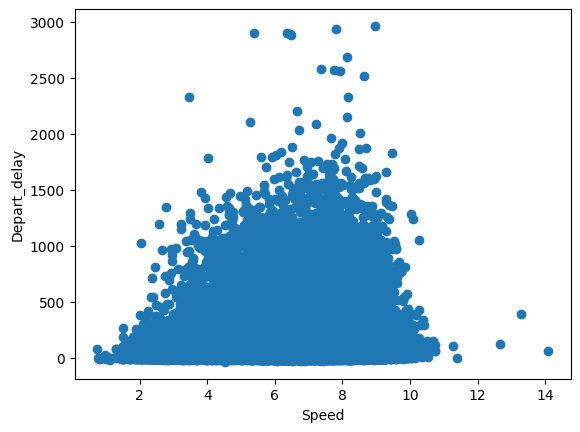

In [ ]:
plt.scatter(data.speed,data.DEP_DELAY)
plt.xlabel('Speed')
plt.ylabel('Depart_delay')

Text(0, 0.5, 'arrival_delay')

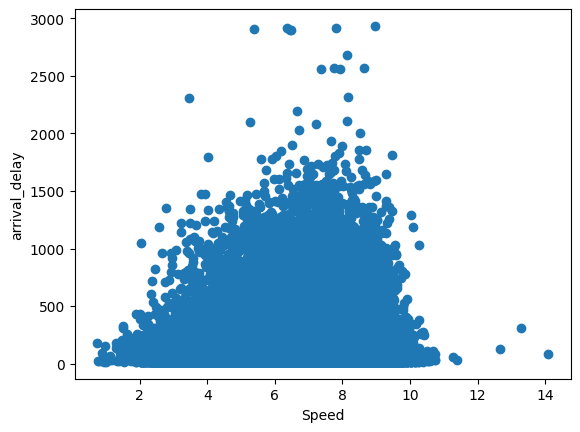

In [ ]:
plt.scatter(data.speed,data.ARR_DELAY)
plt.xlabel('Speed')
plt.ylabel('arrival_delay')

#### OUR ASSUMPTION WAS RIGHT TO SOME EXTENT
##### High speed flights (>10) speed mostly are delayed very less

#### Departure delay depends on facilities available on ORIGIN airport and arrival delay on DEST airport
#### lets see which city airports are most prone to delay

In [ ]:
data.columns

Index(['Unnamed: 0.1', 'FL_DATE', 'AIRLINE', 'FL_NUMBER', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED',
       'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
       'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT',
       'speed'],
      dtype='object')

In [ ]:
lok=late_dept.groupby('ORIGIN')['DEP_DELAY'].size().sort_values(ascending=False).reset_index()
tok=late_arr.groupby('DEST')['ARR_DELAY'].size().sort_values(ascending=False).reset_index()

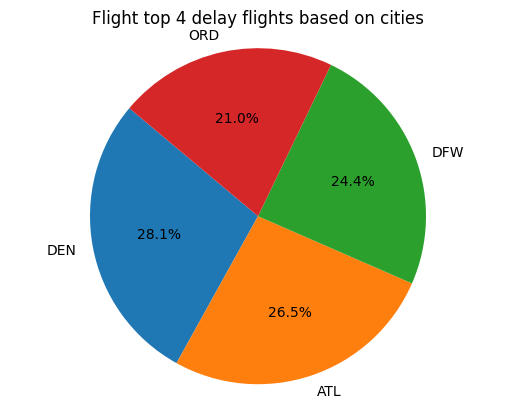

In [ ]:
plt.pie(lok.DEP_DELAY[:4], labels=lok.ORIGIN[:4],autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.title('Flight top 4 delay flights based on cities')
plt.show()

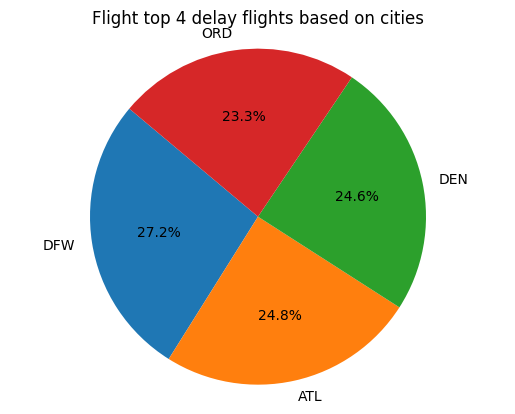

In [ ]:
plt.pie(tok.ARR_DELAY[:4], labels=tok.DEST[:4],autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.title('Flight top 4 delay flights based on cities')
plt.show()

#### DEN is very bad at departing the flights on time
#### DFW is bad at receiviing the flights at time

In [ ]:
data[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']]

,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,17.0,0.0,13.0,0.0,32.0
8,16.0,0.0,33.0,0.0,0.0
9,0.0,0.0,0.0,0.0,58.0
10,0.0,3.0,0.0,0.0,24.0
13,0.0,9.0,19.0,0.0,0.0
...,...,...,...,...,...
2999975,18.0,0.0,0.0,0.0,0.0
2999978,19.0,0.0,0.0,0.0,0.0
2999983,0.0,36.0,21.0,0.0,0.0
2999997,0.0,0.0,0.0,0.0,27.0


In [ ]:
late_dept=data[data.DEP_DELAY > 0].drop('Unnamed: 0.1',axis=1)
late_arr=data[data.ARR_DELAY > 0].drop('Unnamed: 0.1',axis=1)

In [ ]:
dept_delay_reasons=pd.DataFrame((late_dept[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']]>0).sum(axis=0))

In [ ]:
arr_delay_reasons=pd.DataFrame((late_arr[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']]>0).sum(axis=0))

In [ ]:
dept_delay_reasons.rename(columns={0: 'counts'}, inplace=True)
arr_delay_reasons.rename(columns={0: 'counts'}, inplace=True)

Text(0.5, 1.0, 'Reasons of delay of departure fights')

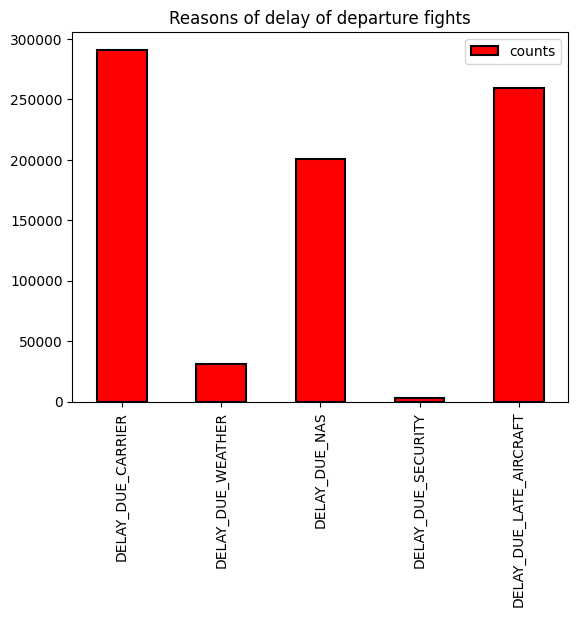

In [ ]:
dept_delay_reasons.plot(kind='bar', color='red', edgecolor='black', linewidth=1.5)
plt.title('Reasons of delay of departure fights')


Text(0.5, 1.0, 'Reasons of delay of arrival fights')

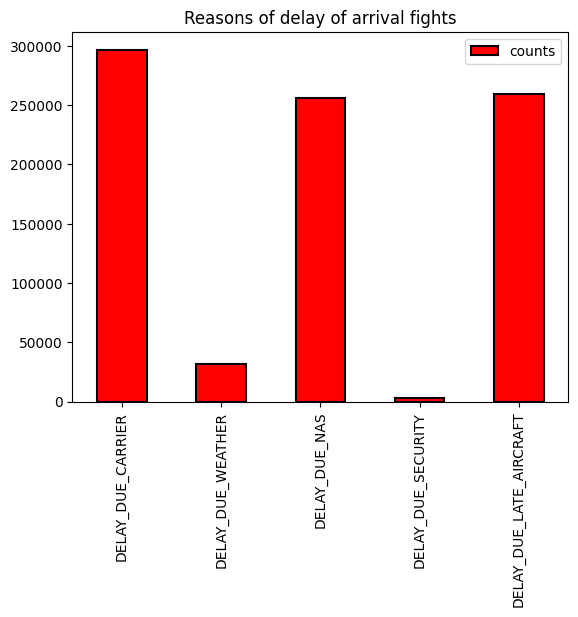

In [ ]:
arr_delay_reasons.plot(kind='bar', color='red', edgecolor='black', linewidth=1.5)
plt.title('Reasons of delay of arrival fights')


In [ ]:
#plt.figure(figsize=(12, 6))  # Adjust the size as needed
#plt.pie(dept_delay_reasons[0], labels=dept_delay_reasons.index,autopct='%1.1f%%', startangle=140)
#plt.axis('equal')  # Ensures the pie chart is a circle
#plt.title('Flight dept delay reasons')
#plt.show()

In [ ]:
#plt.pie(arr_delay_reasons[0], labels=arr_delay_reasons.index,autopct='%1.1f%%', startangle=140)
#plt.axis('equal')  # Ensures the pie chart is a circle
#plt.title('Flight arr delay reasons')
#plt.show()

## INSIGHTS
#### Mostly delay is due to carrier and secondly due to late aircraft in both arrival and dept

In [ ]:
data.drop('Unnamed: 0.1',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533863 entries, 0 to 2999998
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   FL_DATE                  533863 non-null  datetime64[ns]
 1   AIRLINE                  533863 non-null  object        
 2   FL_NUMBER                533863 non-null  int64         
 3   ORIGIN                   533863 non-null  object        
 4   DEST                     533863 non-null  object        
 5   CRS_DEP_TIME             533863 non-null  int64         
 6   DEP_DELAY                533863 non-null  float64       
 7   TAXI_OUT                 533863 non-null  float64       
 8   WHEELS_OFF               533863 non-null  float64       
 9   WHEELS_ON                533863 non-null  float64       
 10  TAXI_IN                  533863 non-null  float64       
 11  CRS_ARR_TIME             533863 non-null  int64         
 12  ARR_DELAY           

#### CONVERT CATEGORICAL DATA INTO NUMERICAL

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
categories=['AIRLINE','ORIGIN','DEST']

In [ ]:
for i in categories:
    data[i] = label_encoder.fit_transform(data[i])
data

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,speed
0,2019-01-01,10,1527,123,223,1354,49.0,19.0,1502.0,1739.0,...,0.0,0.0,157.0,937.0,17.0,0.0,13.0,0.0,32.0,5.968153
8,2019-01-01,14,5942,127,99,1550,16.0,15.0,1621.0,1934.0,...,0.0,0.0,133.0,844.0,16.0,0.0,33.0,0.0,0.0,6.345865
9,2019-01-01,15,1156,332,260,2135,67.0,11.0,2253.0,2346.0,...,0.0,0.0,53.0,333.0,0.0,0.0,0.0,0.0,58.0,6.283019
10,2019-01-01,2,2783,114,190,1431,55.0,10.0,1536.0,2050.0,...,0.0,0.0,194.0,1746.0,0.0,3.0,0.0,0.0,24.0,9.000000
13,2019-01-01,2,562,261,276,1105,9.0,21.0,1135.0,1422.0,...,0.0,0.0,227.0,1440.0,0.0,9.0,19.0,0.0,0.0,6.343612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999975,2023-08-31,4,4904,210,37,945,35.0,32.0,1052.0,1147.0,...,0.0,0.0,55.0,378.0,18.0,0.0,0.0,0.0,0.0,6.872727
2999978,2023-08-31,17,1309,123,47,1130,23.0,24.0,1217.0,1309.0,...,0.0,0.0,112.0,748.0,19.0,0.0,0.0,0.0,0.0,6.678571
2999983,2023-08-31,2,640,276,77,2259,36.0,50.0,25.0,701.0,...,0.0,0.0,216.0,1773.0,0.0,36.0,21.0,0.0,0.0,8.208333
2999997,2023-08-31,16,1244,99,199,945,30.0,18.0,1033.0,1056.0,...,0.0,0.0,83.0,628.0,0.0,0.0,0.0,0.0,27.0,7.566265


## Now as we are not getting any insights from the speed column so we will find insights from distance cols as:
#### 1. Long flights take longer time to get ready for takeoff
#### 2. They need more food items to serve to passengers during the long flights
#### 3. They need to make available more fuel in might be short notice so delay might be due to this
### So we can make a new column of reasons with the col name operational efficiency

In [ ]:
data.columns

Index(['FL_DATE', 'AIRLINE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'AIR_TIME',
       'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'speed'],
      dtype='object')

In [ ]:
late_dept

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,CANCELLED,DIVERTED,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,speed
0,2019-01-01,JetBlue Airways,1527,EWR,MCO,1354,49.0,19.0,1502.0,1739.0,...,0.0,0.0,157.0,937.0,17.0,0.0,13.0,0.0,32.0,5.968153
8,2019-01-01,SkyWest Airlines Inc.,5942,FAT,DEN,1550,16.0,15.0,1621.0,1934.0,...,0.0,0.0,133.0,844.0,16.0,0.0,33.0,0.0,0.0,6.345865
9,2019-01-01,Southwest Airlines Co.,1156,SJC,ONT,2135,67.0,11.0,2253.0,2346.0,...,0.0,0.0,53.0,333.0,0.0,0.0,0.0,0.0,58.0,6.283019
10,2019-01-01,American Airlines Inc.,2783,EGE,JFK,1431,55.0,10.0,1536.0,2050.0,...,0.0,0.0,194.0,1746.0,0.0,3.0,0.0,0.0,24.0,9.000000
13,2019-01-01,American Airlines Inc.,562,ORD,PHX,1105,9.0,21.0,1135.0,1422.0,...,0.0,0.0,227.0,1440.0,0.0,9.0,19.0,0.0,0.0,6.343612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999975,2023-08-31,Endeavor Air Inc.,4904,LGA,BGR,945,35.0,32.0,1052.0,1147.0,...,0.0,0.0,55.0,378.0,18.0,0.0,0.0,0.0,0.0,6.872727
2999978,2023-08-31,United Air Lines Inc.,1309,EWR,BNA,1130,23.0,24.0,1217.0,1309.0,...,0.0,0.0,112.0,748.0,19.0,0.0,0.0,0.0,0.0,6.678571
2999983,2023-08-31,American Airlines Inc.,640,PHX,CLT,2259,36.0,50.0,25.0,701.0,...,0.0,0.0,216.0,1773.0,0.0,36.0,21.0,0.0,0.0,8.208333
2999997,2023-08-31,Spirit Air Lines,1244,DEN,LAS,945,30.0,18.0,1033.0,1056.0,...,0.0,0.0,83.0,628.0,0.0,0.0,0.0,0.0,27.0,7.566265


In [ ]:
late_dept.describe().DISTANCE

count    471807.000000
mean        838.686351
min          31.000000
25%         406.000000
50%         718.000000
75%        1072.000000
max        5095.000000
std         583.037391
Name: DISTANCE, dtype: float64

In [ ]:
dist_delay_dept=late_dept.copy()

In [ ]:
late_dept.DISTANCE.max()

5095.0

In [ ]:
variables=[1,2,3,4,5]
values=[0,500,1500,2500,3500,late_dept.DISTANCE.max()]
for i in variables:
    dist_delay_dept.loc[(dist_delay_dept.DISTANCE>=values[i-1]) & (dist_delay_dept.DISTANCE<=values[i]),'DISTANCE']=i

In [ ]:
dist_delay_dept.DISTANCE.unique()

array([2., 1., 3., 4., 5.])

In [ ]:
jok=dist_delay_dept.groupby('DISTANCE')['DEP_DELAY'].size().sort_values(ascending=False).reset_index()

In [ ]:
jok.index=jok.DISTANCE

Text(0.5, 1.0, 'Flight delay based on the distance of flight')

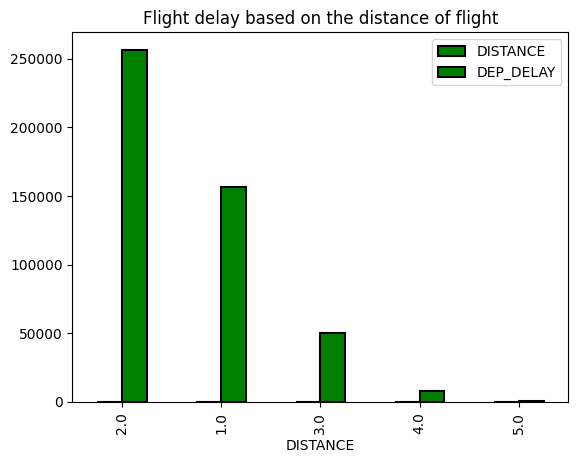

In [ ]:
jok[jok.columns].plot(kind='bar', color='green', edgecolor='black', linewidth=1.5)
plt.title('Flight delay based on the distance of flight')

## AH! We got one more insight after analysing the dataset
### INSIGHTS ARE DIFF FROM OUR ASSUMPTION BUT GOT SOME PATTERN IN THE DATASET
### Long distance flights suffer less delay than short flights
#### Maybe it is because the short distance are given less priority than longer flights

### It means that none of the flights were cancelled or diverted so we can just cancel the flights if the delay is high

### As we are dealing with the delay and reschedule if high delay  so need to look forward to it

In [ ]:
data.drop(['CANCELLED','DIVERTED'],axis=1,inplace=True) # no use of them

### Lets see if there is year by year growth in reducing the delay or not

In [ ]:
data['year']=data.FL_DATE.dt.year
data.year.unique()

array([2019, 2020, 2021, 2022, 2023])

In [ ]:
late_arr=data[data.ARR_DELAY > 0]
late_dept=data[data.DEP_DELAY > 0]

In [ ]:
lok=late_arr.groupby('year')['ARR_DELAY'].size().sort_values(ascending=False).reset_index()
dok=late_dept.groupby('year')['DEP_DELAY'].size().sort_values(ascending=False).reset_index()

In [ ]:
lok.index=lok.year
dok.index=dok.year

In [ ]:
lok.drop('year',axis=1,inplace=True)

In [ ]:
dok.drop('year',axis=1,inplace=True)

Text(0.5, 1.0, 'Flight arr delay based on year')

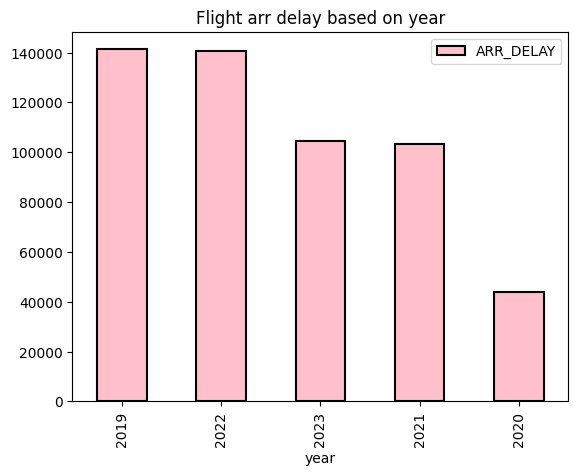

In [ ]:
lok.plot(kind='bar', color='pink', edgecolor='black', linewidth=1.5)
plt.title('Flight arr delay based on year')

Text(0.5, 1.0, 'Flight dept delay based on year')

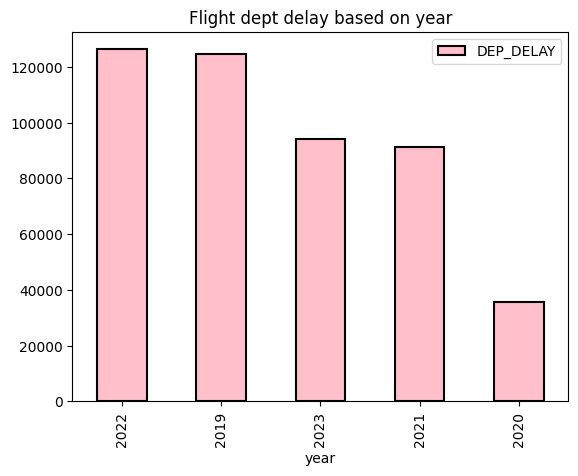

In [ ]:
dok.plot(kind='bar', color='pink', edgecolor='black', linewidth=1.5)
plt.title('Flight dept delay based on year')

## We got something interesting here
### The number of delayed flights is minimum in the year 2020 means least number of flights in this year
## It might be due to arrival of COVID-19 at that time

## Now lets see the most busiest routes from our dataset

In [ ]:
routes = luck.groupby(['ORIGIN', 'DEST']).size().reset_index(name='Flight_Count')
routes=routes.sort_values(by='Flight_Count', ascending=False)


In [ ]:
routes['Combined'] = routes['ORIGIN'].astype(str) + '-' + routes['DEST'].astype(str)

In [ ]:
hok=routes[['Flight_Count','Combined']].head(10)

In [ ]:
hok.index=hok.Combined
hok.drop('Combined',axis=1,inplace=True)

Text(0.5, 0, 'Routes')

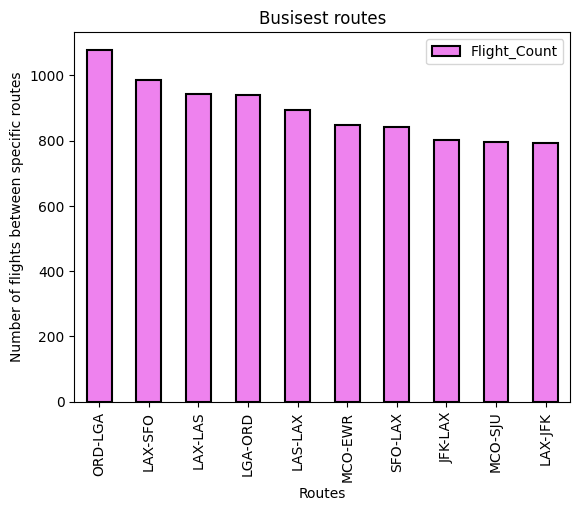

In [ ]:
hok.plot(kind='bar', color='violet', edgecolor='black', linewidth=1.5)
plt.title('Busisest routes')
plt.ylabel('Number of flights between specific routes')
plt.xlabel('Routes')

## So the route between ORD-LGA is the busisest route among all the routes with total of 1000+ Flights

## Lets now see how arrival and departure delay depends on the time of the day( evening , morning ....)

In [ ]:
def classify_time(time):
    # Convert time to hours and minutes
    hours = time // 100
    minutes = time % 100
    # Determine the period
    if 4 <= hours < 12:
        return 'Morning'
    elif 12 <= hours < 16:
        return 'Afternoon'
    elif 16 <= hours < 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the classification
luck['dept_time_of_day'] = luck['CRS_DEP_TIME'].apply(classify_time)
luck['arr_time_of_day'] = luck['CRS_ARR_TIME'].apply(classify_time)



In [ ]:
sok=luck[luck.DEP_DELAY>0].groupby('dept_time_of_day')['DEP_DELAY'].size().sort_values(ascending=False).reset_index()
aok=luck[luck.ARR_DELAY>0].groupby('arr_time_of_day')['ARR_DELAY'].size().sort_values(ascending=False).reset_index()

Text(0, 0.5, 'No of departure delay')

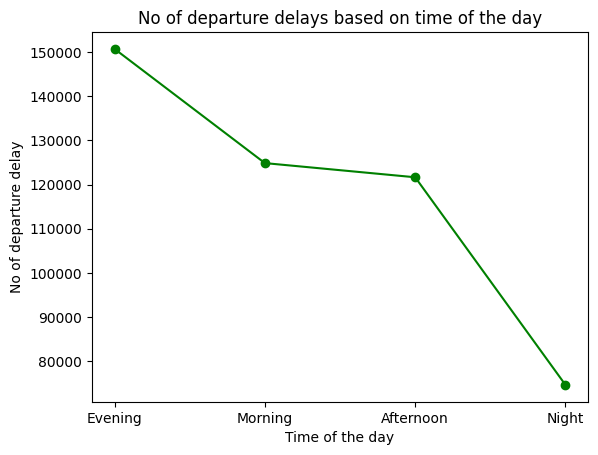

In [ ]:
plt.plot(sok['dept_time_of_day'], sok['DEP_DELAY'], marker='o', linestyle='-', color='green')  # 'o' for points, '-' for solid line, 'b' for blue
plt.title('No of departure delays based on time of the day')
plt.xlabel('Time of the day')
plt.ylabel('No of departure delay')

Text(0, 0.5, 'No of arrival delay')

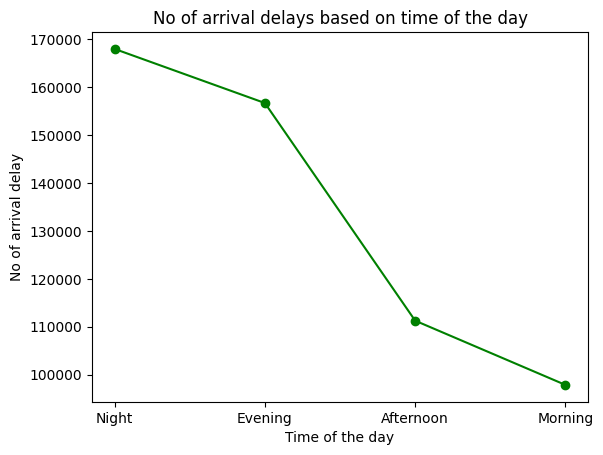

In [ ]:
plt.plot(aok['arr_time_of_day'], aok['ARR_DELAY'], marker='o', linestyle='-', color='green')  # 'o' for points, '-' for solid line, 'b' for blue
plt.title('No of arrival delays based on time of the day')
plt.xlabel('Time of the day')
plt.ylabel('No of arrival delay')

## Insights
#### 1. For departure mainly evening and morning flights are delayed
#### 2. For arrival mostly night and evening flights are delayed
#### Evening flights face delays for both departures and arrivals, indicating high air traffic during evening hours. This could imply congestion-related issues or cumulative delays from earlier flights.

## Lets see how delays number vary with seasons

In [ ]:
data['month']=data.FL_DATE.dt.month

In [ ]:
def map_season(month):
    if month in [1, 2, 12]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to the column
data['season'] = data['month'].apply(map_season)

In [ ]:
poki=data[data.DEP_DELAY>0].groupby('season')['DEP_DELAY'].size().sort_values(ascending=False).reset_index()
soki=data[data.ARR_DELAY>0].groupby('season')['ARR_DELAY'].size().sort_values(ascending=False).reset_index()

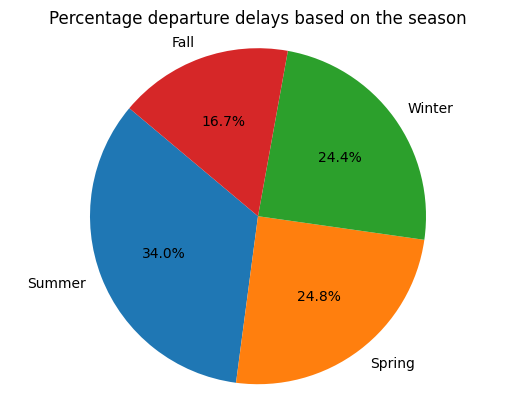

In [ ]:
plt.pie(poki.DEP_DELAY, labels=poki.season,autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.title('Percentage departure delays based on the season')
plt.show()

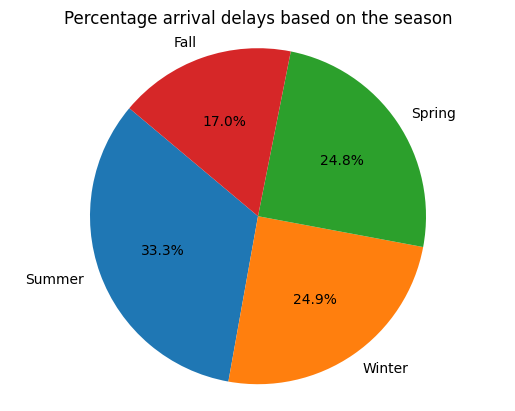

In [ ]:
plt.pie(soki.ARR_DELAY, labels=soki.season,autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.title('Percentage arrival delays based on the season')
plt.show()

## It means mostly the flight delay in summer
#### Summer often sees a surge in travel due to school vacations and holiday seasons, leading to busier airports and increased demand for flights. This congestion can result in delays.


## Lets see if the number of delays depend on weekdays/holidays

In [ ]:
pip install holidays


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import holidays

# Extract weekday
data['weekday'] = data['FL_DATE'].dt.day_name()

# Initialize US holidays
us_holidays = holidays.US()

# Identify holidays
data['holiday'] = data['FL_DATE'].apply(lambda x: x in us_holidays)

In [ ]:
loki=data[data.DEP_DELAY>0].groupby('holiday')['DEP_DELAY'].size().sort_values(ascending=False).reset_index()
toki=data[data.ARR_DELAY>0].groupby('holiday')['ARR_DELAY'].size().sort_values(ascending=False).reset_index()

In [ ]:
loki['holiday'] = loki['holiday'].apply(lambda x: "Weekday" if x else "Holiday")
toki['holiday'] = toki['holiday'].apply(lambda x: "Weekday" if x else "Holiday")
loki = loki.rename(columns={'holiday': 'day'})
toki = toki.rename(columns={'holiday': 'day'})

In [ ]:
loki = loki.set_index('day')
toki = toki.set_index('day')

Text(0.5, 0, 'Type of day')

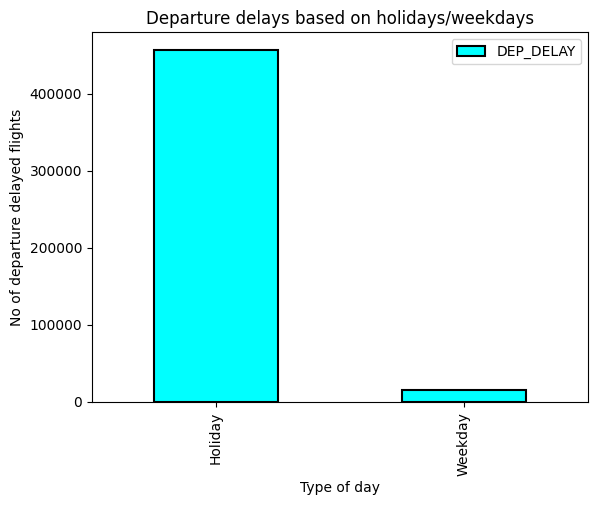

In [ ]:
loki.plot(kind='bar', color='cyan', edgecolor='black', linewidth=1.5)
plt.title('Departure delays based on holidays/weekdays')
plt.ylabel('No of departure delayed flights')
plt.xlabel('Type of day')

Text(0.5, 0, 'Type of day')

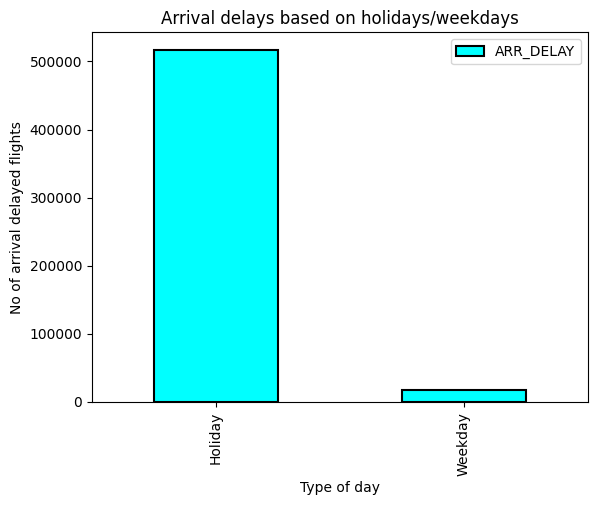

In [ ]:
toki.plot(kind='bar', color='cyan', edgecolor='black', linewidth=1.5)
plt.title('Arrival delays based on holidays/weekdays')
plt.ylabel('No of arrival delayed flights')
plt.xlabel('Type of day')

## Holidays are higly prone to delays comapred to normal weekdays
### During holidays, travel and shipment volumes often surge, leading to potential congestion and delays across transportation networks, airports, or delivery services.
### OR
### Companies may have reduced staffing during holidays, causing slower processing times and delays in handling the increased demand.

## Lets see if the TAXI_IN/OUT is dependent on airport/flight number/airline or not

In [ ]:
data.columns

Index(['FL_DATE', 'AIRLINE', 'FL_NUMBER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
       'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'speed', 'year',
       'month', 'season', 'weekday', 'holiday'],
      dtype='object')

In [ ]:
pot=data[['AIRLINE', 'FL_NUMBER','ORIGIN', 'DEST','TAXI_IN','TAXI_OUT']]

In [ ]:
pot.describe()

,AIRLINE,FL_NUMBER,ORIGIN,DEST,TAXI_IN,TAXI_OUT
count,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,9.574556,2407.073118,182.419967,186.151670,9.429814,21.632426
std,5.865619,1716.706167,99.711113,100.632372,10.123430,15.291081
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,993.000000,99.000000,99.000000,4.000000,12.000000
50%,12.000000,2058.000000,190.000000,199.000000,6.000000,17.000000
75%,15.000000,3596.000000,261.000000,270.000000,10.000000,25.000000
max,17.000000,9562.000000,379.000000,379.000000,249.000000,184.000000


## On an avergae normal airports have taxi_in time = 10 minutes and taxi_out time = 20 minutes
### But for larger airports it is (20,30) minutes
### So we will take the threshold as (20,30)

In [ ]:
pot['TAXI_IN'] = np.where(pot['TAXI_IN'] > 20, 'High', 'Low')
pot['TAXI_OUT'] = np.where(pot['TAXI_OUT'] > 30, 'High', 'Low')

C:\Users\Jatin Sharma\AppData\Local\Temp\ipykernel_21616\501678591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pot['TAXI_IN'] = np.where(pot['TAXI_IN'] > 20, 'High', 'Low')
C:\Users\Jatin Sharma\AppData\Local\Temp\ipykernel_21616\501678591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pot['TAXI_OUT'] = np.where(pot['TAXI_OUT'] > 30, 'High', 'Low')


In [ ]:
pot.AIRLINE=luck.AIRLINE

C:\Users\Jatin Sharma\AppData\Local\Temp\ipykernel_21616\2735605724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pot.AIRLINE=luck.AIRLINE


In [ ]:
koku=pot[pot.TAXI_IN == 'High'].groupby('AIRLINE')['TAXI_IN'].size().sort_values(ascending=False).reset_index()
poku=pot[pot.TAXI_OUT == 'High'].groupby('AIRLINE')['TAXI_OUT'].size().sort_values(ascending=False).reset_index()

In [ ]:
koku = koku.set_index('AIRLINE')
poku = poku.set_index('AIRLINE')

Text(0.5, 0, 'Airline')

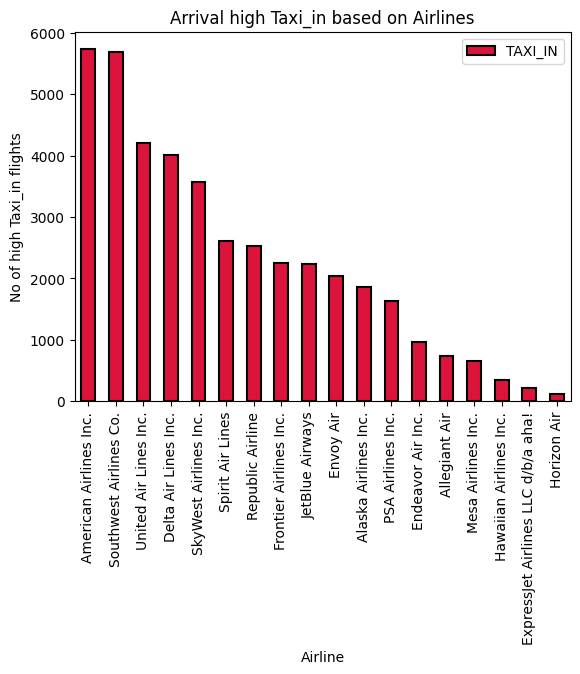

In [ ]:
koku.plot(kind='bar', color='Crimson', edgecolor='black', linewidth=1.5)
plt.title('Arrival high Taxi_in based on Airlines')
plt.ylabel('No of high Taxi_in flights')
plt.xlabel('Airline')

Text(0.5, 0, 'Airline')

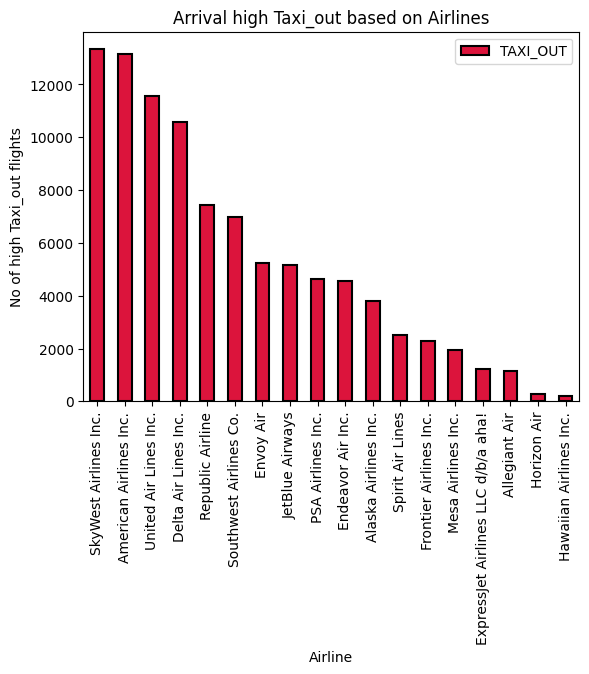

In [ ]:
poku.plot(kind='bar', color='Crimson', edgecolor='black', linewidth=1.5)
plt.title('Arrival high Taxi_out based on Airlines')
plt.ylabel('No of high Taxi_out flights')
plt.xlabel('Airline')

### American airlines has the most number of high taxi_in time flights
### Skywest airlines has the most number of high taxi_out time flights

## According to airport

In [ ]:
momo_dep=data[['ORIGIN','TAXI_OUT']]
fomo_arr=data[['DEST','TAXI_IN']]

In [ ]:
momo_dep.loc[:,'ORIGIN']=luck.ORIGIN
fomo_arr.loc[:,'DEST']=luck.DEST

C:\Users\Jatin Sharma\AppData\Local\Temp\ipykernel_21616\3460569428.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['EWR' 'FAT' 'SJC' ... 'PHX' 'DEN' 'TPA']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  momo_dep.loc[:,'ORIGIN']=luck.ORIGIN
C:\Users\Jatin Sharma\AppData\Local\Temp\ipykernel_21616\3460569428.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['MCO' 'DEN' 'ONT' ... 'CLT' 'LAS' 'EWR']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  fomo_arr.loc[:,'DEST']=luck.DEST


In [ ]:
fomo_arr.loc[:,'TAXI_IN'] = np.where(fomo_arr['TAXI_IN'] > 20, 'High', 'Low')
momo_dep.loc[:,'TAXI_OUT'] = np.where(momo_dep['TAXI_OUT'] > 30, 'High', 'Low')

C:\Users\Jatin Sharma\AppData\Local\Temp\ipykernel_21616\1454458240.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Low' 'High' 'Low' ... 'Low' 'Low' 'Low']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  fomo_arr.loc[:,'TAXI_IN'] = np.where(fomo_arr['TAXI_IN'] > 20, 'High', 'Low')
C:\Users\Jatin Sharma\AppData\Local\Temp\ipykernel_21616\1454458240.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Low' 'Low' 'Low' ... 'High' 'Low' 'Low']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  momo_dep.loc[:,'TAXI_OUT'] = np.where(momo_dep['TAXI_OUT'] > 30, 'High', 'Low')


In [ ]:
tiki=fomo_arr[fomo_arr.TAXI_IN == 'High'].groupby('DEST')['TAXI_IN'].size().sort_values(ascending=False).reset_index()
piki=momo_dep[momo_dep.TAXI_OUT == 'High'].groupby('ORIGIN')['TAXI_OUT'].size().sort_values(ascending=False).reset_index()

In [ ]:
tiki = tiki.set_index('DEST')
piki = piki.set_index('ORIGIN')

Text(0.5, 0, 'DEST')

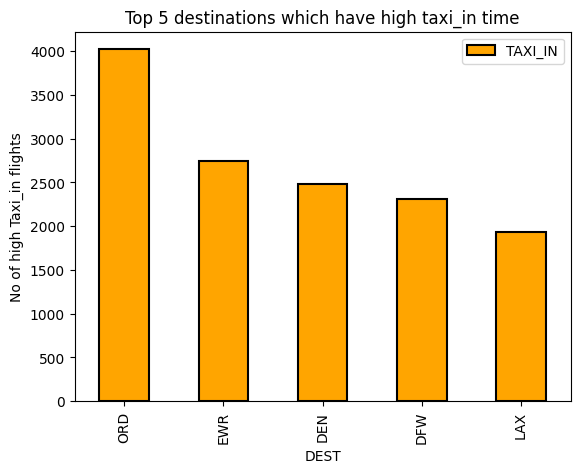

In [ ]:
tiki[:5].plot(kind='bar', color='orange', edgecolor='black', linewidth=1.5)
plt.title('Top 5 destinations which have high taxi_in time')
plt.ylabel('No of high Taxi_in flights')
plt.xlabel('DEST')

Text(0.5, 0, 'ORIGIN')

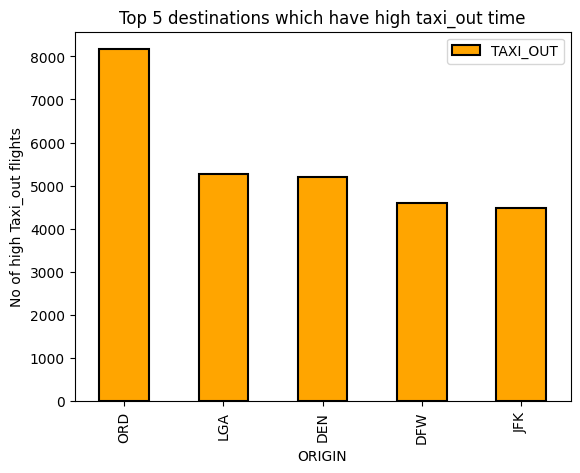

In [ ]:
piki[:5].plot(kind='bar', color='orange', edgecolor='black', linewidth=1.5)
plt.title('Top 5 destinations which have high taxi_out time')
plt.ylabel('No of high Taxi_out flights')
plt.xlabel('ORIGIN')

## ORD has the most number of delayed taxi_in as well as taxi_out duration

### We need to make a function that gives out the columns we need for modelling the data

In [ ]:
def last_data(df):
    tf=data[(data.AIRLINE==df.AIRLINE) & (data.FL_NUMBER==df.FL_NUMBER) & (data.ORIGIN==df.ORIGIN) & (data.DEST==df.DEST) & (data.CRS_DEP_TIME==df.CRS_DEP_TIME) & (data.CRS_ARR_TIME==df.CRS_ARR_TIME)].tail(1)
    return tf[['DEP_DELAY','TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN','ARR_DELAY', 'CANCELLED_RESCHEDULED', 'DIVERTED',
       'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
       'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']]

In [ ]:
data.season.unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [ ]:
season_map = {"Summer": 1, "Winter": 2, "Fall": 3, "Spring":4}
data["season"] = data["season"].map(season_map)

In [ ]:
data.holiday=data.holiday.astype(int)

In [ ]:
data.to_csv("open_iit.csv", index=False)

In [ ]:
numerical_cols=['AIRLINE', 'FL_NUMBER', 'ORIGIN', 'DEST','DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN','ARR_DELAY', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'speed', 'year',
       'month', 'season','holiday']

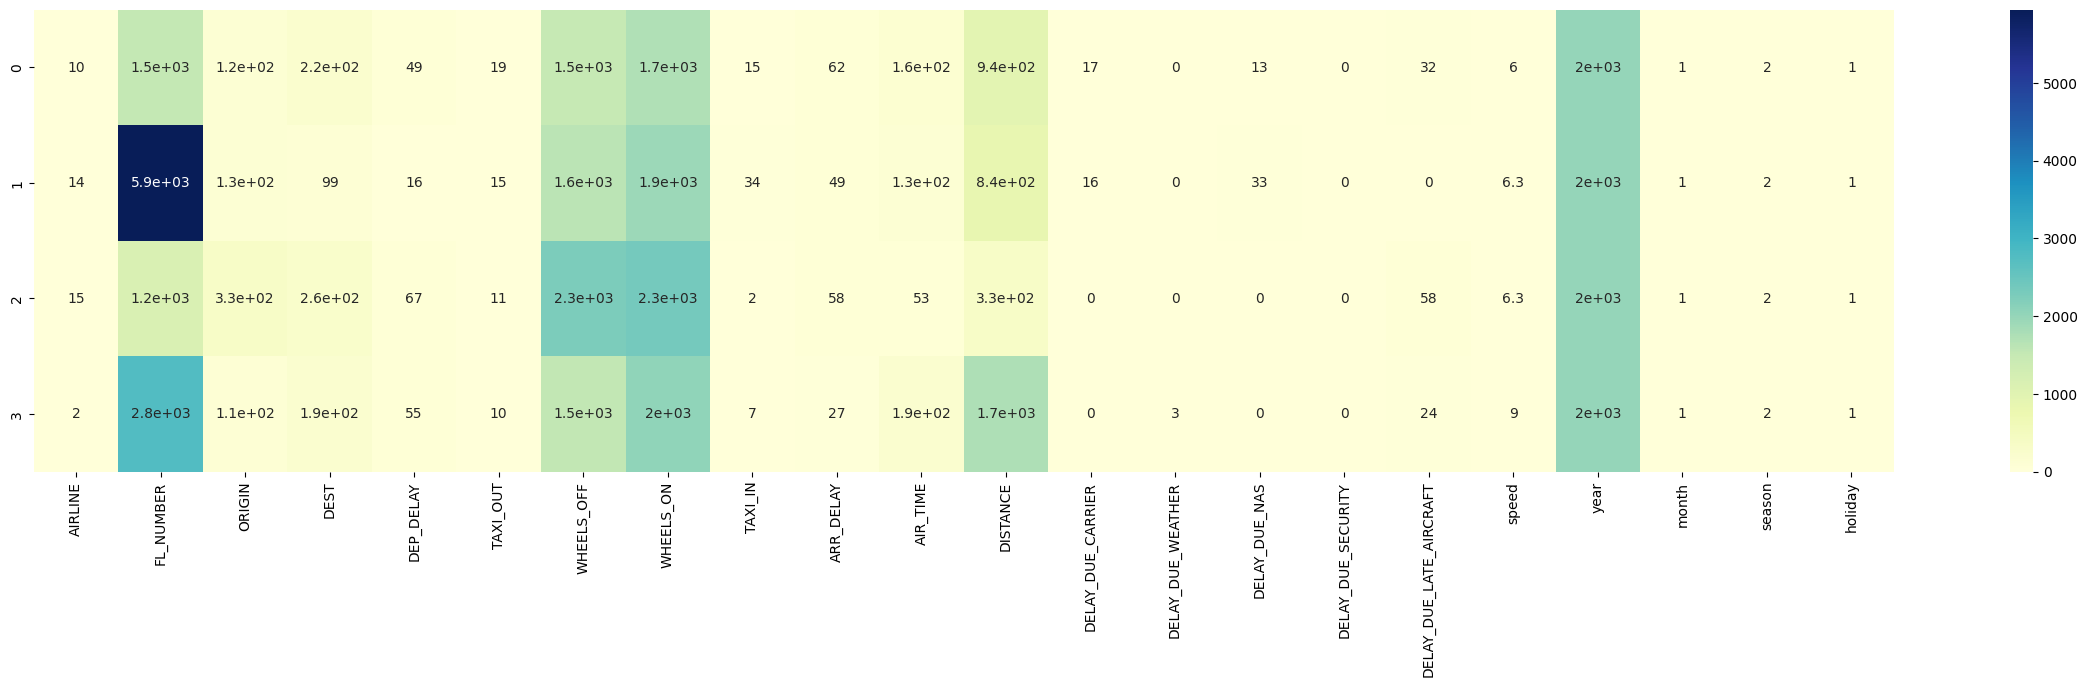

In [ ]:
plt.figure(figsize=(30, 6))

sns.heatmap(np.array(data.loc[:10,numerical_cols]), annot=True, cmap="YlGnBu",xticklabels=numerical_cols)

# Display the plot
plt.show()


# DONE !